# Mesh Refinement Comparison for Detonation Tube
1/17/20, by Duncan McGough

---

Load packages:

In [10]:
using CSV
using Plots; gr();

Import data:

In [19]:
l_sample = 1000 # how many sample points
Ae_s = "./" # path to simulations
#simnames = ["1000_3","5000_1","7000_1","10000_1"] .* "/"
#simnames = ["50000_1","20000_1","10000_1","7000_1","5000_1","1000_3","5000_3_3","500_3_3"] .* "/"
#simnames = ["10000_3","10000_1"] .* "/"
#simnames = ["50000_1"] .* "/"
simnames = ["2500_3_3_amr","2500_3_3","5000_3_3"] .* "/"
nsims = length(simnames) # how many simulations are run
pp_s = "postProcessing/sample/3e-05/" # path to line samples
#pp_s = "postProcessing/sample/6e-05/" # path to line samples
Tp_s = "data_T_p_H2.xy" # T, p data file name
U_s = "data_U.xy" # U vector file name 

tmp = [] # initalize temp dataframe variable 
x = zeros(l_sample,nsims) # initialize position
p = zeros(l_sample,nsims) # initialize pressure
T = zeros(l_sample,nsims) # initialize temperature
Ux = zeros(l_sample,nsims) # initialize x velocity
H2 = zeros(l_sample,nsims) # initialize H2 concentration

for i=1:nsims # sweep through refinements
    tmp = CSV.read(Ae_s*simnames[i]*pp_s*Tp_s,delim=' ',header=0) # import position, temp, pressure
    x[:,i] = tmp[:,1] # store position
    p[:,i] = tmp[:,3] # store pressure
    T[:,i] = tmp[:,2] # store temperature
    H2[:,i] = tmp[:,4] # store H2 concentration
    
    tmp = CSV.read(Ae_s*simnames[i]*pp_s*U_s,delim=' ',header=0) # import position, Ux, Uy, Uz
    Ux[:,i] = tmp[:,2] # store Ux
end

Now, let's plot this stuff:

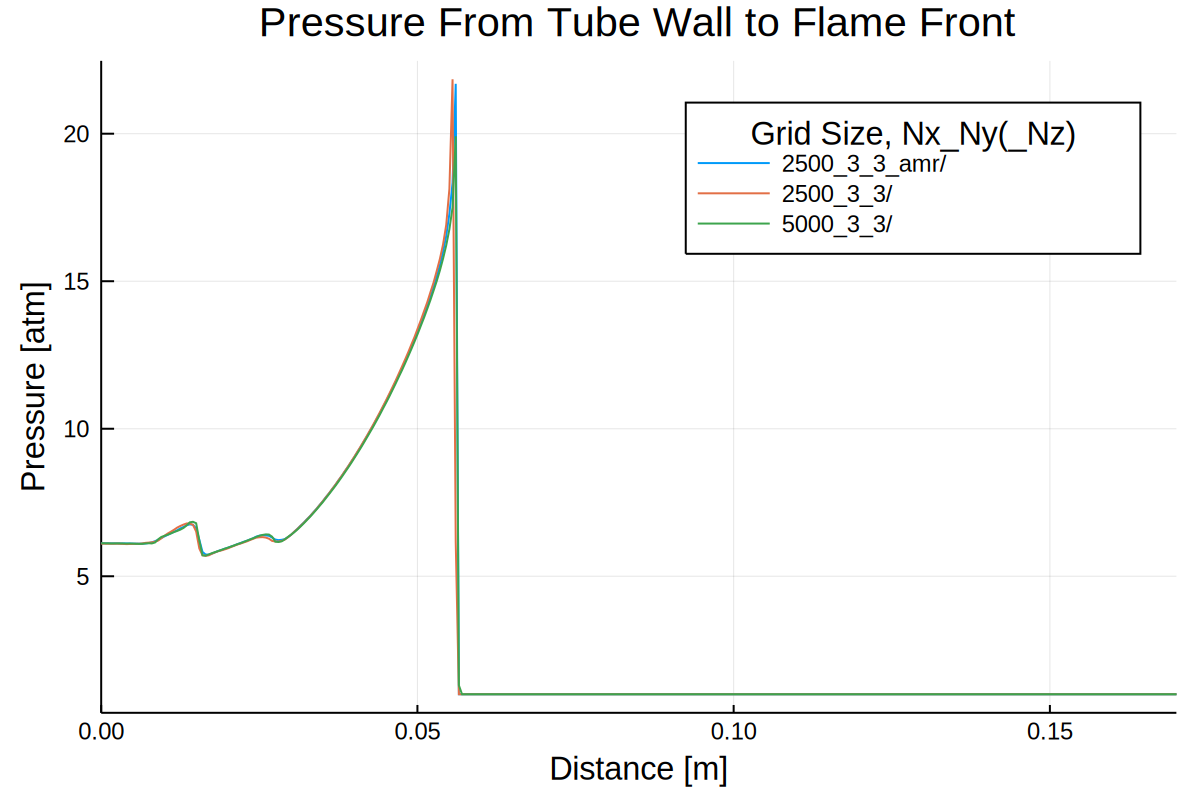

In [20]:
p_plot = plot() # initialize plot
for i=1:nsims # sweep through simulations
    plot!(x[:,i],p[:,i]*0.000009869233,xlims=(0,0.17),label=simnames[i])
end
title!("Pressure From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Pressure [atm]")
plot!(legendtitle="Grid Size, Nx_Ny(_Nz)",dpi=200)
#plot!(LinRange(0,0.5,1000),ones(1000).*15.56,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
savefig("./figs/p.png")
display(p_plot)

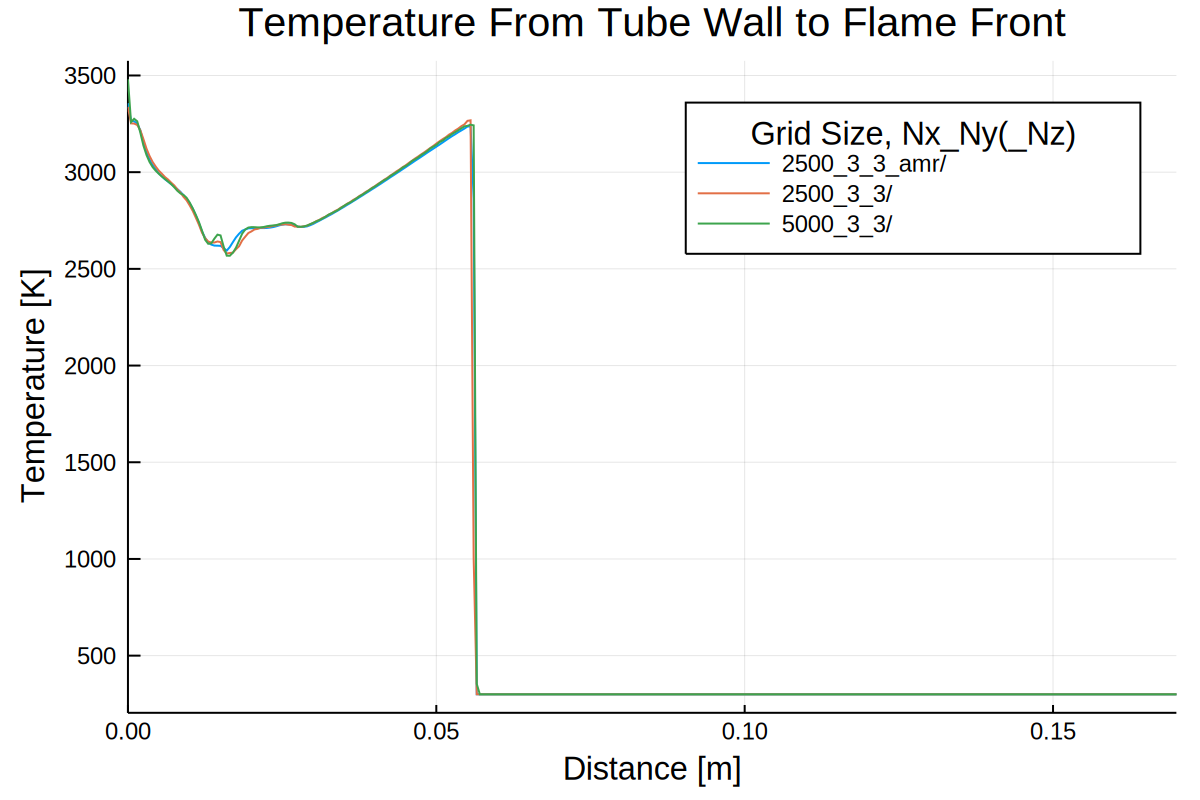

In [21]:
t_plot = plot() # initialize plot
for i=1:nsims # sweep through simulations
    plot!(x[:,i],T[:,i],xlims=(0,0.17),label=simnames[i])
end
title!("Temperature From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Temperature [K]")
plot!(legendtitle="Grid Size, Nx_Ny(_Nz)",dpi=200)
#plot!(LinRange(0,0.5,1000),ones(1000).*2942,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
savefig("./figs/t.png")
display(t_plot)

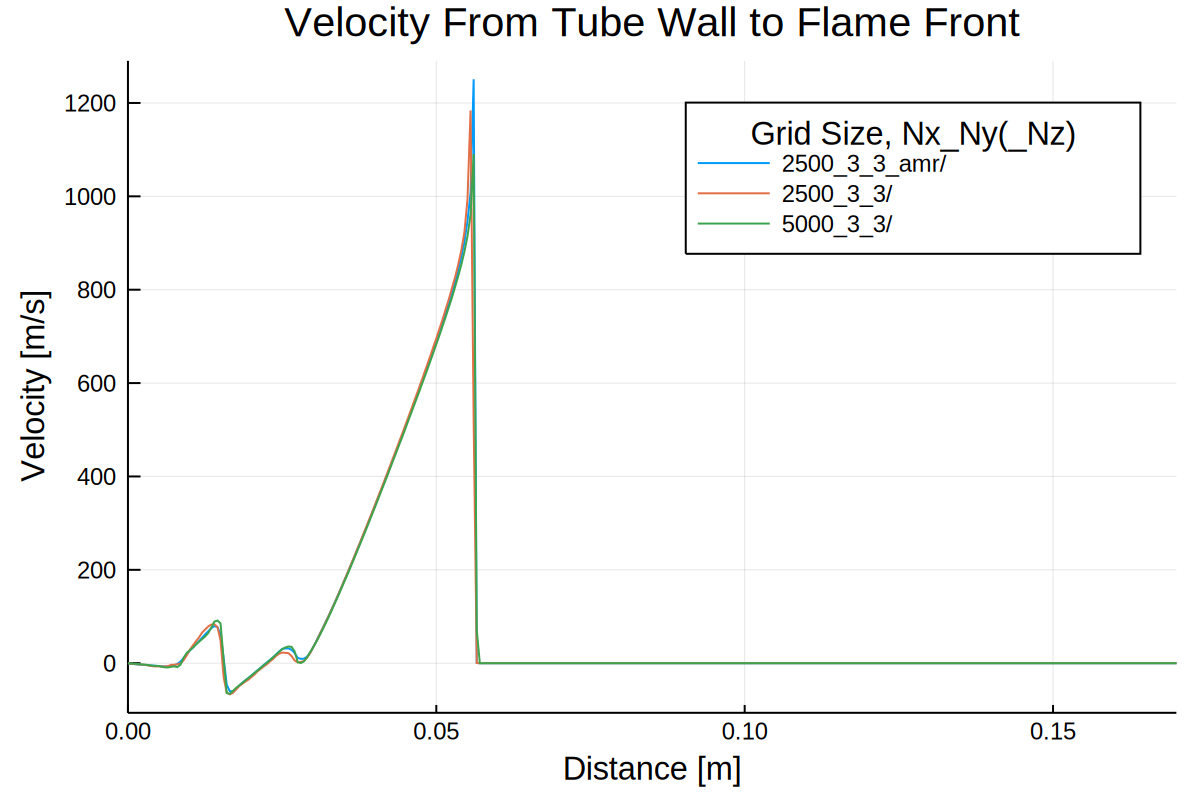

In [22]:
u_plot = plot() # initialize plot
for i=1:nsims # sweep through simulations
    plot!(x[:,i],Ux[:,i],xlims=(0,0.17),label=simnames[i])
end
title!("Velocity From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Velocity [m/s]")
plot!(legendtitle="Grid Size, Nx_Ny(_Nz)",dpi=200)
#plot!(LinRange(0,0.5,1000),ones(1000).*800,xlims=(0,0.17),label="Target",linestyle=:dash,c="black")
savefig("./figs/u.png")
display(u_plot)

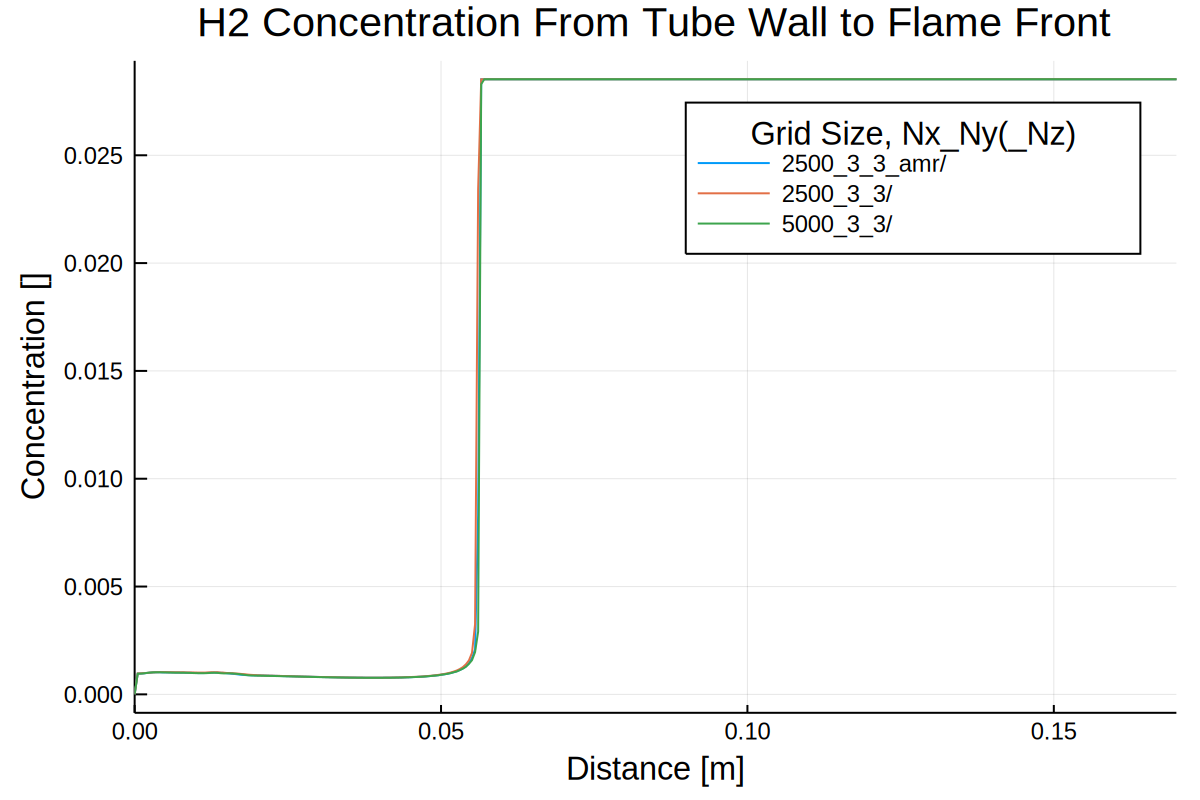

In [24]:
u_plot = plot() # initialize plot
for i=1:nsims # sweep through simulations
    plot!(x[:,i],H2[:,i],xlims=(0,0.17),label=simnames[i])
end
title!("H2 Concentration From Tube Wall to Flame Front")
xlabel!("Distance [m]")
ylabel!("Concentration []")
plot!(legendtitle="Grid Size, Nx_Ny(_Nz)",dpi=200)
savefig("./figs/h2.png")
display(u_plot)